# **Business Case: Ola**

# Submitted by: Moin Khan
# email: kmoin19121994@gmail.com

Google Colab link: https://colab.research.google.com/drive/1P2_PbN2mUOyOfBzBE4Dek4BTcvJ-DwoH?usp=sharing

# Importing the dataset and determining its structure

In [1]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Downloading the dataset
!gdown 1MNUR3-z0fKVfJQbPdE8gvj6mdKCuVjMq

Downloading...
From: https://drive.google.com/uc?id=1MNUR3-z0fKVfJQbPdE8gvj6mdKCuVjMq
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 22.3MB/s]


In [3]:
df = pd.read_csv("ola_driver_scaler.csv")

In [4]:
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


We notice that there are more than one rows corresponding to each Driver_ID.

In [5]:
#Dropping irrelevant feature "Unnamed: 0"
df.drop(columns="Unnamed: 0", inplace=True)

In [6]:
#Dimensions of the dataset
df.shape

(19104, 13)

In [7]:
#Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [8]:
#Checking the percentage of missing values in each column
missing_percentage  = round((df.isna().sum()/len(df))*100,2)
missing_percentage = missing_percentage.sort_values(ascending=False)
missing_percentage

,0
LastWorkingDate,91.54
Age,0.32
Gender,0.27
Driver_ID,0.00
MMM-YY,0.00
City,0.00
Education_Level,0.00
Income,0.00
Dateofjoining,0.00
Joining Designation,0.00


The LastWorkingDate column has 91.54% missing values because each Driver_ID corresponds to multiple rows, and the last working date is recorded only once per driver. Additionally, for drivers who are still working, this field remains null, further increasing the number of missing values.

In [9]:
#Checking for duplicate rows
dup_rows = df[df.duplicated()]
dup_rows

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating


There are no duplicate rows in the dataset.

In [10]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [11]:
#For visualizing all features
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Exploratory Data Analysis

## Range of Attributes

In [12]:
df["Driver_ID"].nunique()

2381

The dataset contains 19,000+ rows, but only 2,381 unique drivers, meaning each driver has multiple records, likely representing different time periods or events related to their employment.

In [13]:
df["City"].unique()

array(['C23', 'C7', 'C13', 'C9', 'C11', 'C2', 'C19', 'C26', 'C20', 'C17',
       'C29', 'C10', 'C24', 'C14', 'C6', 'C28', 'C5', 'C18', 'C27', 'C15',
       'C8', 'C25', 'C21', 'C1', 'C4', 'C3', 'C16', 'C22', 'C12'],
      dtype=object)

In [14]:
df["Education_Level"].unique()

array([2, 0, 1])

In [15]:
df["Joining Designation"].unique()

array([1, 2, 3, 4, 5])

In [16]:
df["Grade"].unique()

array([1, 2, 3, 4, 5])

In [17]:
df["Quarterly Rating"].unique()

array([2, 1, 4, 3])

Since each Driver_ID has multiple rows, the range of numerical features should be calculated only after consolidating the data to ensure one row per driver.

## Handling Missing Values

In [18]:
#KNNImputer for filling missing values in "Age" column
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df[["Age"]] = imputer.fit_transform(df[["Age"]])

In [19]:
#Filling missing 'Gender' values with the mode per Driver_ID.
df["Gender"] = df["Gender"].fillna(df.groupby("Driver_ID")["Gender"].transform(lambda x:x.mode()[0]))  # Use mode for Gender

In [20]:
#Checking missing values after imputations to verify reductions
missing_percentage  = round((df.isna().sum()/len(df))*100,2)
missing_percentage = missing_percentage.sort_values(ascending=False)
missing_percentage.head()

,0
LastWorkingDate,91.54
Driver_ID,0.00
Age,0.00
Gender,0.00
MMM-YY,0.00


"LastWorkingDate" is not handled yet, as it will be addressed after consolidating the data to ensure one row per Driver_ID.

## Data Cleaning

In [21]:
#Renaming some columns for better readability
df.rename(columns={"MMM-YY":"Month",
                   "Joining Designation":"Joining_Designation",
                   "Dateofjoining":"JoiningDate",
                   "Total Business Value":"Total_Business_Value",
                   "Quarterly Rating":"Quarterly_Rating"}, inplace=True)

In [22]:
#Converting "Month", "JoiningDate", and "LastWorkingDate" columns to datetime format
df["Month"] = pd.to_datetime(df["Month"],format="%m/%d/%y")
df["JoiningDate"] = pd.to_datetime(df["JoiningDate"],format="%d/%m/%y")
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"], format="%d/%m/%y", errors="coerce")

In [23]:
df.head()

,Month,Driver_ID,Age,Gender,City,Education_Level,Income,JoiningDate,LastWorkingDate,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-11-03,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1


All date columns are now converted to the Year-Month-Day (YYYY-MM-DD) format

In [24]:
#Condensing data to retain first and last recorded values for each Driver_ID
agg1 = df.groupby("Driver_ID").aggregate({
    "Month":["first","last"],
    "Income":["first","last"],
    "Grade":["first","last"],
    "Quarterly_Rating":["first","last"]
})

agg1 = agg1.reset_index()
agg1.columns = ["_".join(col).strip("_") for col in agg1.columns]
agg1.head()

,Driver_ID,Month_first,Month_last,Income_first,Income_last,Grade_first,Grade_last,Quarterly_Rating_first,Quarterly_Rating_last
0,1,2019-01-01,2019-03-01,57387,57387,1,1,2,2
1,2,2020-11-01,2020-12-01,67016,67016,2,2,1,1
2,4,2019-12-01,2020-04-01,65603,65603,2,2,1,1
3,5,2019-01-01,2019-03-01,46368,46368,1,1,1,1
4,6,2020-08-01,2020-12-01,78728,78728,3,3,1,2


In [25]:
#Consolidating the remaining features as per required aggregation
agg2 = df.groupby("Driver_ID").aggregate({
    "Age":"max",
    "Gender":"first",
    "City":"first",
    "Education_Level":"first",
    "JoiningDate":"first",
    "LastWorkingDate":"last",
    "Joining_Designation":"last",
    "Total_Business_Value":"sum"
    })

agg2 = agg2.reset_index()
agg2.head()

,Driver_ID,Age,Gender,City,Education_Level,JoiningDate,LastWorkingDate,Joining_Designation,Total_Business_Value
0,1,28.0,0.0,C23,2,2018-12-24,2019-11-03,1,1715580
1,2,31.0,0.0,C7,2,2020-06-11,NaT,2,0
2,4,43.0,0.0,C13,2,2019-07-12,2020-04-27,2,350000
3,5,29.0,0.0,C9,0,2019-09-01,2019-07-03,1,120360
4,6,31.0,1.0,C11,1,2020-07-31,NaT,3,1265000


In [26]:
#Merging the above two aggregated datasets to create a consolidated driver profile.
df_merged = pd.merge(agg1, agg2, on="Driver_ID")
df_merged.head()

,Driver_ID,Month_first,Month_last,Income_first,Income_last,Grade_first,Grade_last,Quarterly_Rating_first,Quarterly_Rating_last,Age,Gender,City,Education_Level,JoiningDate,LastWorkingDate,Joining_Designation,Total_Business_Value
0,1,2019-01-01,2019-03-01,57387,57387,1,1,2,2,28.0,0.0,C23,2,2018-12-24,2019-11-03,1,1715580
1,2,2020-11-01,2020-12-01,67016,67016,2,2,1,1,31.0,0.0,C7,2,2020-06-11,NaT,2,0
2,4,2019-12-01,2020-04-01,65603,65603,2,2,1,1,43.0,0.0,C13,2,2019-07-12,2020-04-27,2,350000
3,5,2019-01-01,2019-03-01,46368,46368,1,1,1,1,29.0,0.0,C9,0,2019-09-01,2019-07-03,1,120360
4,6,2020-08-01,2020-12-01,78728,78728,3,3,1,2,31.0,1.0,C11,1,2020-07-31,NaT,3,1265000


In [27]:
df_merged.shape

(2381, 17)

## Feature Engineering

In [28]:
#Creating a flag column to indicate whether the driver's income increased over time (1 = Increased, 0 = Not Increased).
df_merged["Income_increase"] = np.where(df_merged["Income_last"]-df_merged["Income_first"]>0,1,0)

In [29]:
#Flagging drivers with grade improvement (1 = Increased, 0 = Not Increased)
df_merged["Grade_increase"] = np.where(df_merged["Grade_last"]-df_merged["Grade_first"]>0,1,0)

In [30]:
#Flagging drivers with Quarterly rating improvement (1 = Increased, 0 = Not Increased)
df_merged["Rating_increase"] = np.where(df_merged["Quarterly_Rating_last"]-df_merged["Quarterly_Rating_first"]>0,1,0)

In [31]:
#Defining the target variable: Flagging driver attrition (1 = Left, 0 = Still Working).
df_merged["Left_Company"] = np.where(df_merged["LastWorkingDate"].isna(),0,1)

Drivers with a null "LastWorkingDate" are still working, while those with a recorded date have left the company. To reflect this, we assigned 1 to those who left and 0 to those still working.

In [32]:
#Calculating the number of days each driver has worked
df_merged["days_worked"] = np.where(
    df_merged["Left_Company"]==1,
    (df_merged["LastWorkingDate"] - df_merged["JoiningDate"]).dt.days, #If driver left, use LastWorkingDate
    (df_merged["Month_last"] - df_merged["JoiningDate"]).dt.days +30      #If driver is still working, use Last_Month
)

Here, we calculate the number of days each driver has worked based on their employment status. If a driver has left (Left_Company == 1), we subtract Joining Date from Last Working Date. If still employed (Left_Company == 0), we subtract Date of Joining from Last_Month and adjust Last Month to the last day of that month before computing the difference, ensuring accurate tenure calculation.

In [33]:
#Dropping some irrelevant columns
df_merged.drop(columns=["Month_first","Month_last","Income_first","Grade_first","Quarterly_Rating_first"],inplace=True)

## Univariate Analysis: Categorical variables

In [34]:
#Count of Drivers Who Left vs Still Working
Left_Company_Status = df_merged["Left_Company"].value_counts()
Left_Company_Status

,count
Left_Company,
1,1616
0,765


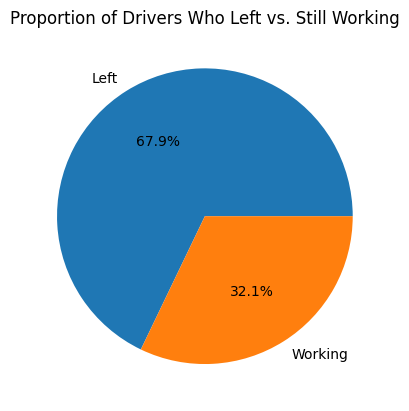

In [35]:
#Proportion of Drivers Who Left vs Still Working
plt.pie(Left_Company_Status, labels=["Left", "Working"], autopct="%1.1f%%")
plt.title("Proportion of Drivers Who Left vs. Still Working")
plt.show()

A significant 67.9% of drivers have left, while only 32.1% remain employed, indicating a notable class imbalance in the target variable. This imbalance suggests that predictive modeling may need techniques like resampling or class-weight adjustments to handle the skewed distribution effectively.

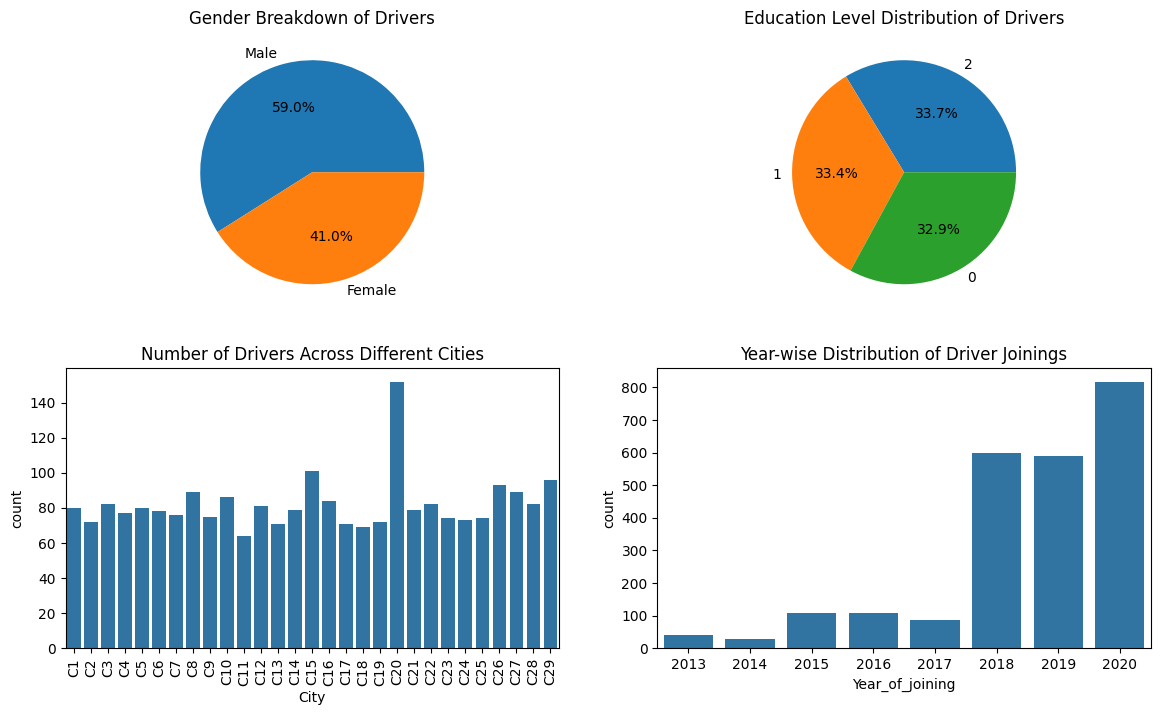

In [36]:
#Visualizing Driver Demographics: Gender, Education, City-Wise Distribution, and Year of Joining
plt.figure(figsize=(14,8))
plt.subplot(221)
gender_distribution = df_merged["Gender"].value_counts()
plt.pie(gender_distribution, labels=["Male", "Female"], autopct="%1.1f%%")
plt.title("Gender Breakdown of Drivers")

plt.subplot(222)
education_level = df_merged["Education_Level"].value_counts()
plt.pie(education_level, labels=education_level.index, autopct="%1.1f%%")
plt.title("Education Level Distribution of Drivers")

plt.subplot(223)
city_order = sorted(df["City"].unique(), key=lambda x: int(x[1:]))
sns.countplot(x="City",data=df_merged, order=city_order)
plt.title("Number of Drivers Across Different Cities")
plt.xticks(rotation=90)

plt.subplot(224)
df_merged["Year_of_joining"] = df_merged["JoiningDate"].dt.year
sns.countplot(x="Year_of_joining",data=df_merged)
plt.title("Year-wise Distribution of Driver Joinings")
plt.show()

1. Gender Breakdown of Drivers:
The dataset has a higher proportion of male drivers (59%) compared to female drivers (41%), indicating a male-dominated workforce.

2. Education Level Distribution of Drivers:
The education levels are fairly balanced, with three categories having nearly equal representation (~33% each). This suggests that drivers come from diverse educational backgrounds.

3. Number of Drivers Across Different Cities:
The distribution of drivers varies across cities, with some cities having significantly more drivers than others. City C20 has the highest number of drivers, possibly due to higher demand or operational presence.

4. Year-wise Distribution of Driver Joinings:
The number of driver joinings increased significantly from 2018 onward, peaking in 2020. This trend may indicate expansion, increased hiring, or growing demand for drivers in recent years.

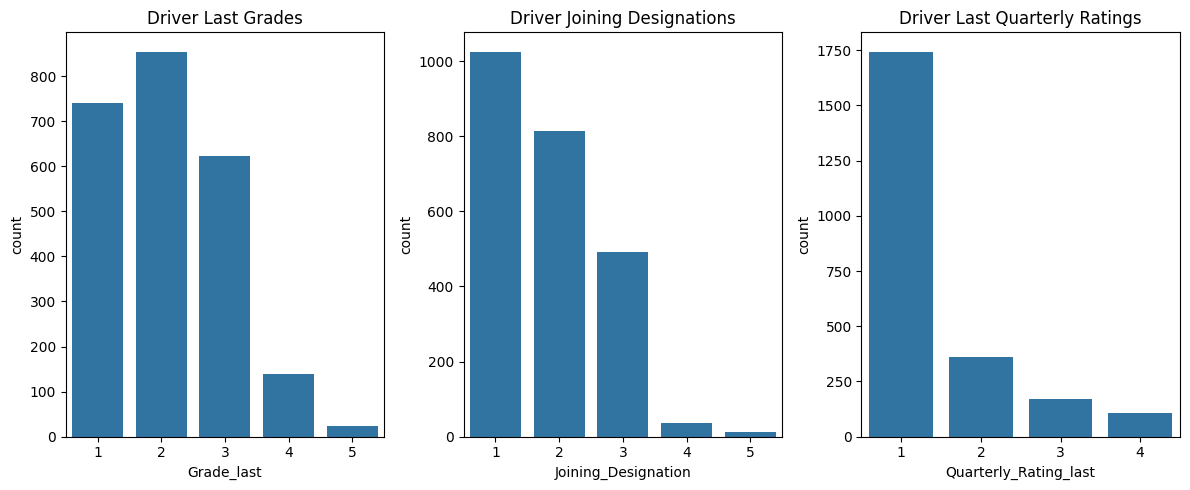

In [37]:
#Visualizing Driver Demographics: Grades, Designations, and Ratings
plt.figure(figsize=(12,5))
plt.subplot(131)
sns.countplot(x="Grade_last",data=df_merged)
plt.title("Driver Last Grades")

plt.subplot(132)
sns.countplot(x="Joining_Designation",data=df_merged)
plt.title("Driver Joining Designations")

plt.subplot(133)
sns.countplot(x="Quarterly_Rating_last",data=df_merged)
plt.title("Driver Last Quarterly Ratings")
plt.tight_layout()
plt.show()

1. Driver Last Grades: Most drivers received grades 1, 2, or 3, with grade 2 being the most common. Higher grades (4 and 5) are relatively rare.

2. Driver Joining Designations: The majority of drivers joined under designation 1, followed by designation 2 and 3. Very few drivers started with designations 4 and 5.

3. Driver Last Quarterly Ratings: A significant number of drivers received a rating of 1 in the last quarter, while ratings of 2, 3, and 4 were much less frequent.

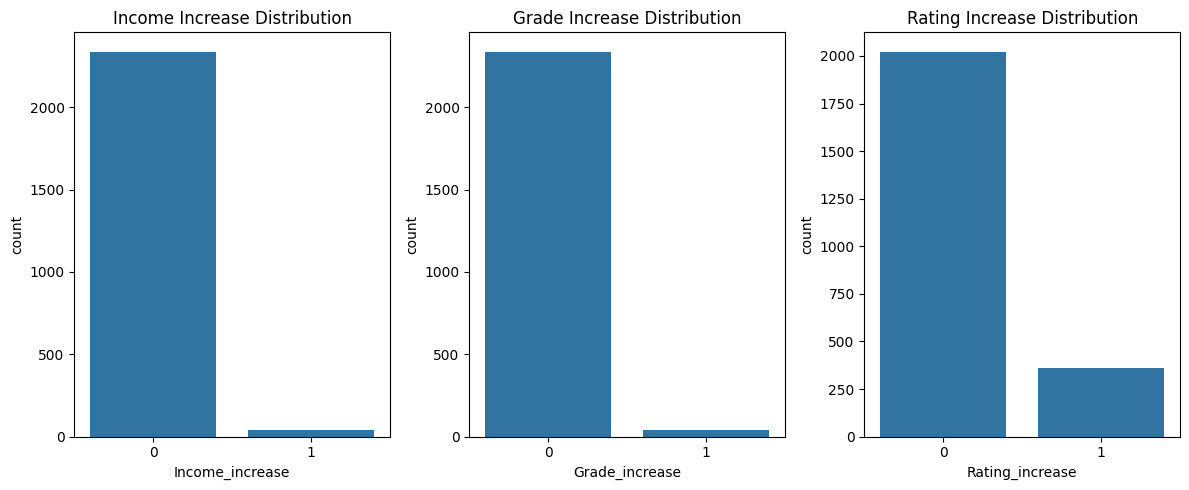

In [38]:
#Distribution of Income, Grade, and Rating Increases Among Drivers
plt.figure(figsize=(12,5))
plt.subplot(131)
sns.countplot(x="Income_increase",data=df_merged)
plt.title("Income Increase Distribution")

plt.subplot(132)
sns.countplot(x="Grade_increase",data=df_merged)
plt.title("Grade Increase Distribution")

plt.subplot(133)
sns.countplot(x="Rating_increase",data=df_merged)
plt.title("Rating Increase Distribution")
plt.tight_layout()
plt.show()

1. Income Increase Distribution: The majority of drivers did not experience an income increase, with only a small fraction receiving a raise.

2. Grade Increase Distribution: Very few drivers had a grade increase, indicating that promotions or grade improvements are uncommon.

3. Rating Increase Distribution: While most drivers did not see a quarterly rating increase, a notable portion did receive an improvement in their ratings.

In [39]:
#Dropping some more irrelevant columns
df_merged.drop(columns=["JoiningDate","LastWorkingDate"], inplace=True)

## Univariate Analysis: Numerical variables

In [40]:
num_cols = ["Age","Income_last","Total_Business_Value","days_worked"]

In [41]:
df_merged[num_cols].describe()

,Age,Income_last,Total_Business_Value,days_worked
count,2381.000000,2381.000000,2.381000e+03,2381.000000
mean,33.804322,59334.157077,4.586742e+06,449.401092
std,5.909102,28383.666384,9.127115e+06,574.043031
min,21.000000,10747.000000,-1.385530e+06,-274.000000
25%,30.000000,39104.000000,0.000000e+00,105.000000
50%,33.000000,55315.000000,8.176800e+05,236.000000
75%,37.000000,75986.000000,4.173650e+06,505.000000
max,58.000000,188418.000000,9.533106e+07,2918.000000


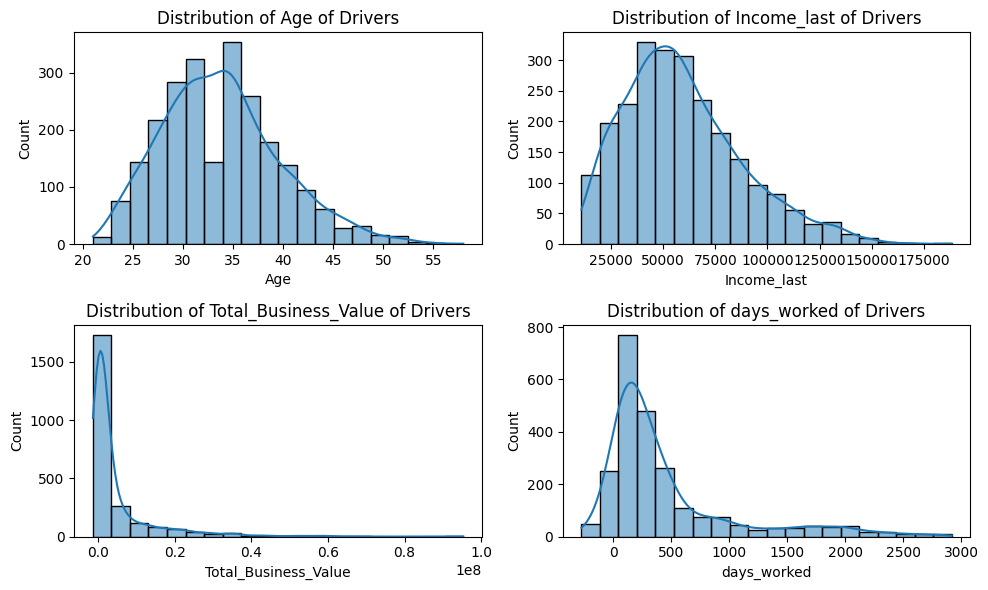

In [42]:
#Univariate analysis of numerical features using histplot
plt.figure(figsize=(10,6))
for i in range(1,5):
  plt.subplot(2,2,i)
  sns.histplot(df_merged[num_cols[i-1]],bins=20, kde=True)
  plt.title(f"Distribution of {num_cols[i-1]} of Drivers")
plt.tight_layout()
plt.show()

1. Age Distribution: The majority of drivers fall within the 25 to 40 age range, with the highest concentration around the early 30s. The distribution follows a slightly right-skewed pattern, indicating fewer older drivers.

2. Income Distribution: Most drivers have an income between 25,000 and 75,000, with a gradual decline as income increases. The right-skewed distribution suggests that higher incomes are relatively rare.

3. Total Business Value Distribution: The distribution is heavily skewed, with a large number of drivers generating low business value, while a small subset contributes significantly higher amounts.

4. Days Worked Distribution: A substantial number of drivers have worked for a few hundred days, but the distribution shows a long tail, suggesting that some drivers have been engaged for many years.

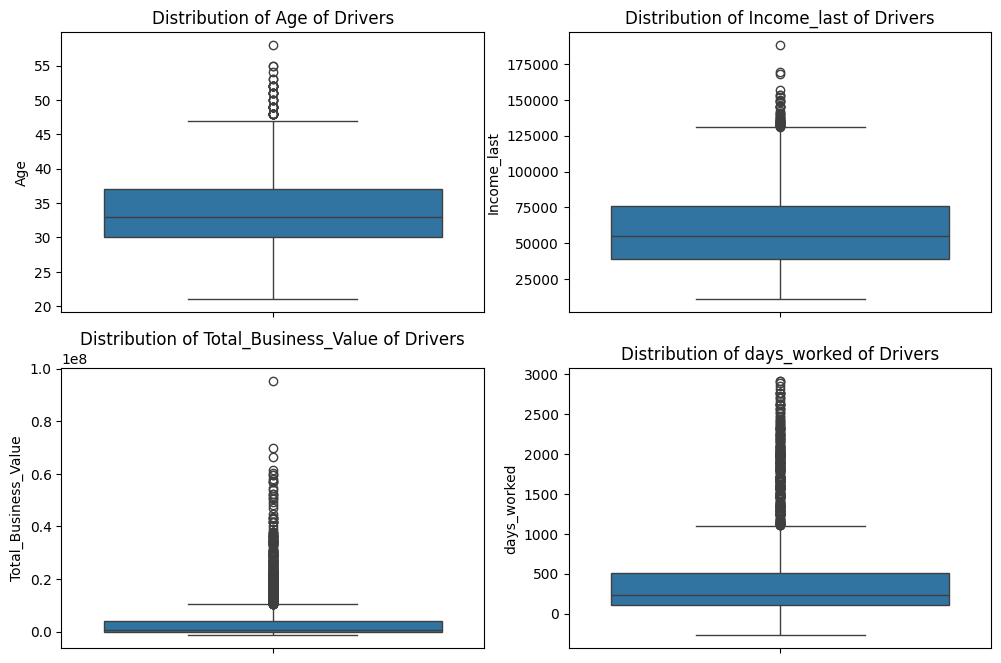

In [43]:
#Univariate analysis of numerical features using boxplot
plt.figure(figsize=(12,8))
for i in range(1,5):
  plt.subplot(2,2,i)
  sns.boxplot(df_merged[num_cols[i-1]])
  plt.title(f"Distribution of {num_cols[i-1]} of Drivers")
plt.show()

1. Age & Income: Both have a fairly normal distribution, but income shows high-end outliers.

2. Total Business Value: Highly skewed, with extreme high-value outliers.

3. Days Worked: Most drivers have worked a few hundred days, but many extreme outliers exist.

## Bivariate Analysis: Categorical Variables

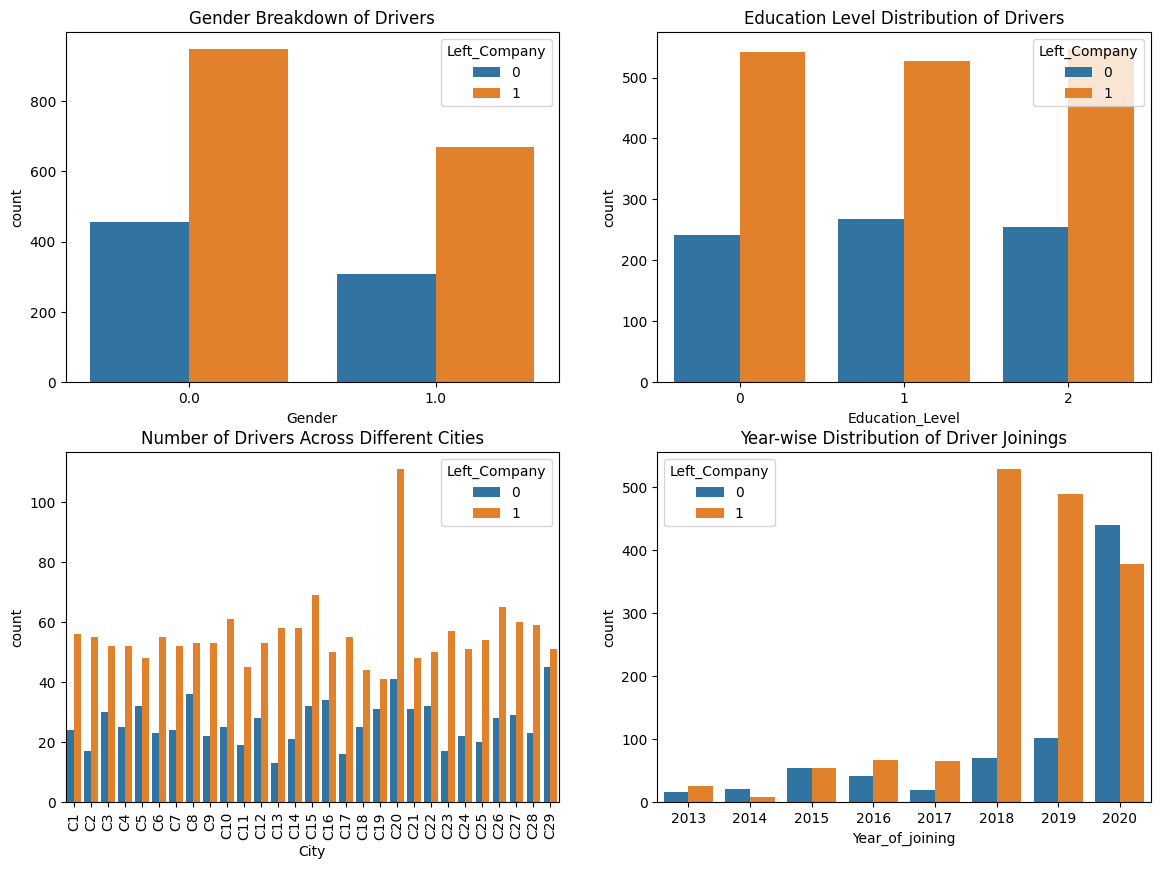

In [44]:
#Visualizing Driver Churn Across Driver Demographics: Gender, Education, City, and Joining Year
plt.figure(figsize=(14,10))
plt.subplot(221)
sns.countplot(x="Gender",data=df_merged, hue="Left_Company")
plt.title("Gender Breakdown of Drivers")

plt.subplot(222)
sns.countplot(x="Education_Level",data=df_merged, hue="Left_Company")
plt.title("Education Level Distribution of Drivers")

plt.subplot(223)
city_order = sorted(df["City"].unique(), key=lambda x: int(x[1:]))
sns.countplot(x="City",data=df_merged, order=city_order, hue="Left_Company")
plt.title("Number of Drivers Across Different Cities")
plt.xticks(rotation=90)

plt.subplot(224)
sns.countplot(x="Year_of_joining",data=df_merged, hue="Left_Company")
plt.title("Year-wise Distribution of Driver Joinings")
plt.show()

1. Gender Breakdown of Drivers: Churn is high for both genders, indicating that retention challenges exist regardless of gender. There is no significant difference in churn patterns between male and female drivers.

2. Education Level Distribution of Drivers: Churn appears fairly consistent across all education levels, suggesting that education is not a key factor in whether a driver stays or leaves.

3. City-wise Driver Distribution: The number of drivers varies across cities, but churn is not uniform—some cities have noticeably higher churn rates than others. For example, C20 has an unusually high churn rate, while other cities have a more balanced split between retained and churned drivers. This suggests that local factors, such as demand, competition, or working conditions, might be influencing driver retention differently across cities.

4. Year-wise Distribution of Driver Joinings: More drivers joined between 2018 and 2020, and their churn is also higher. This could be due to a combination of rapid expansion, onboarding of less-experienced drivers, or external factors affecting retention for newer hires.

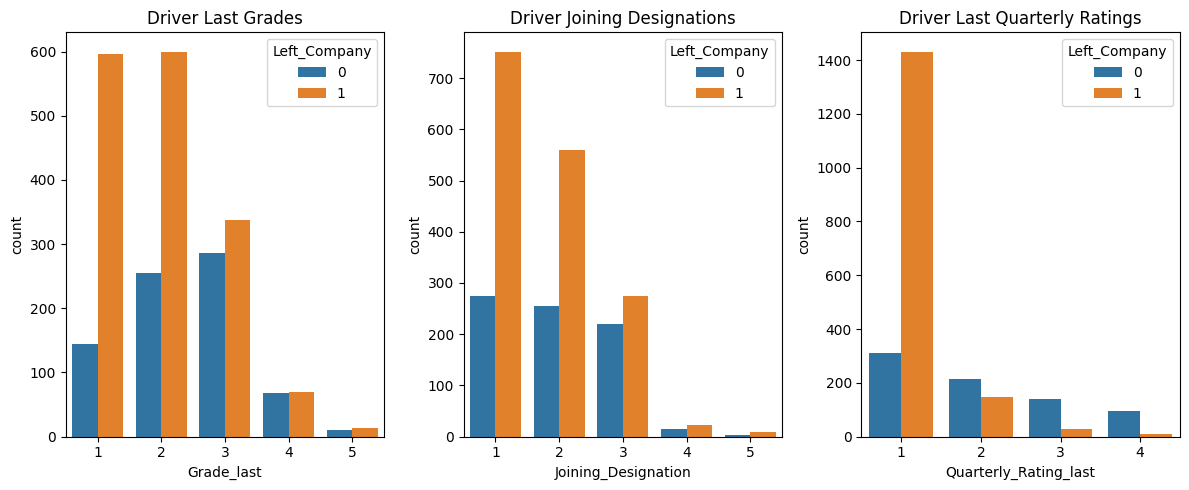

In [45]:
#Understanding Driver Churn: Grades, Designations, and Ratings
plt.figure(figsize=(12,5))
plt.subplot(131)
sns.countplot(x="Grade_last",data=df_merged, hue="Left_Company")
plt.title("Driver Last Grades")

plt.subplot(132)
sns.countplot(x="Joining_Designation",data=df_merged, hue="Left_Company")
plt.title("Driver Joining Designations")

plt.subplot(133)
sns.countplot(x="Quarterly_Rating_last",data=df_merged, hue="Left_Company")
plt.title("Driver Last Quarterly Ratings")
plt.tight_layout()
plt.show()

1. Driver Last Grades: Drivers with lower grades (1 and 2) have extremely high churn, while those with grades 3 and above show relatively better retention. This suggests that performance grading is strongly linked to churn, and lower-rated drivers are more likely to leave.

2. Driver Joining Designations: Churn is significantly higher for drivers who joined at designation levels 1 and 2, indicating that entry-level drivers face the highest attrition. Senior designations (3 and above) show comparatively better retention, implying that experience or job role stability may contribute to lower churn.

3. Driver Last Quarterly Ratings: A massive churn spike is observed for drivers with the lowest rating (1), while those rated 2 or higher show progressively better retention. This highlights a clear link between performance evaluations and driver churn, reinforcing that poorly rated drivers are at the highest risk of leaving.

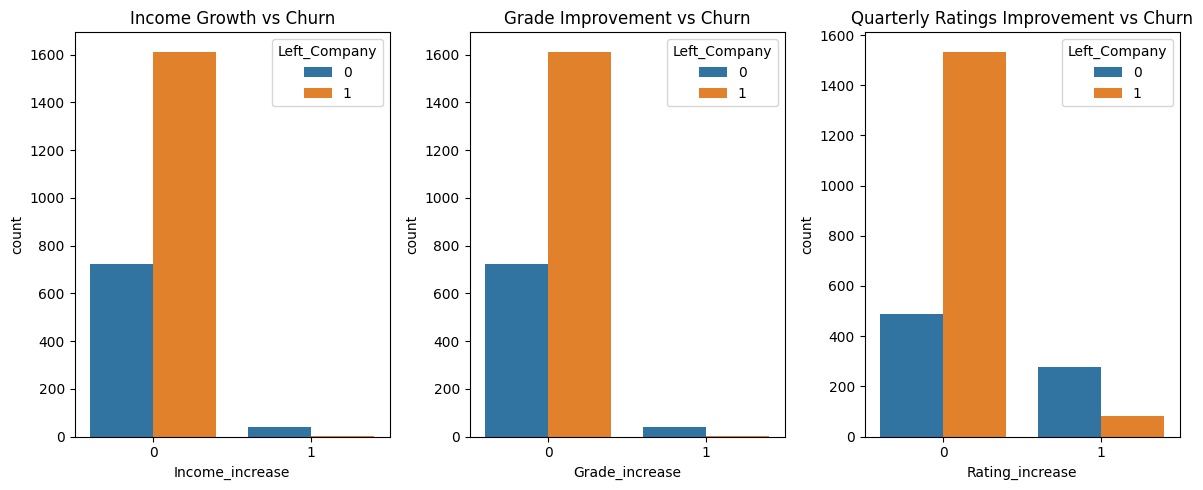

In [46]:
#Understanding Driver Churn: Visualizing impact of Income, Grades, and Ratings improvement
plt.figure(figsize=(12,5))
plt.subplot(131)
sns.countplot(x="Income_increase",data=df_merged, hue="Left_Company")
plt.title("Income Growth vs Churn")

plt.subplot(132)
sns.countplot(x="Grade_increase",data=df_merged, hue="Left_Company")
plt.title("Grade Improvement vs Churn")

plt.subplot(133)
sns.countplot(x="Rating_increase",data=df_merged, hue="Left_Company")
plt.title("Quarterly Ratings Improvement vs Churn")
plt.tight_layout()
plt.show()

1. Income Growth vs Churn: Drivers who did not experience an income increase show massive churn, whereas those who received a raise have near-zero churn. This suggests that salary growth is a key factor in retention, and lack of financial progression pushes drivers to leave.

2. Grade Improvement vs Churn: The story repeats—drivers who didn’t get a grade upgrade are leaving in huge numbers, while those who progressed in grading have almost no churn. This strongly indicates that career stagnation leads to attrition, reinforcing the importance of internal growth opportunities.

3. Quarterly Ratings Improvement vs Churn: Unlike the first two trends, some drivers with rating improvements still churn, but the overall pattern remains: stagnation in ratings leads to high churn, while improvement helps in retention. Performance recognition appears to play a role, but other factors might also be influencing attrition.

## Bivariate Analysis: Numerical Variables

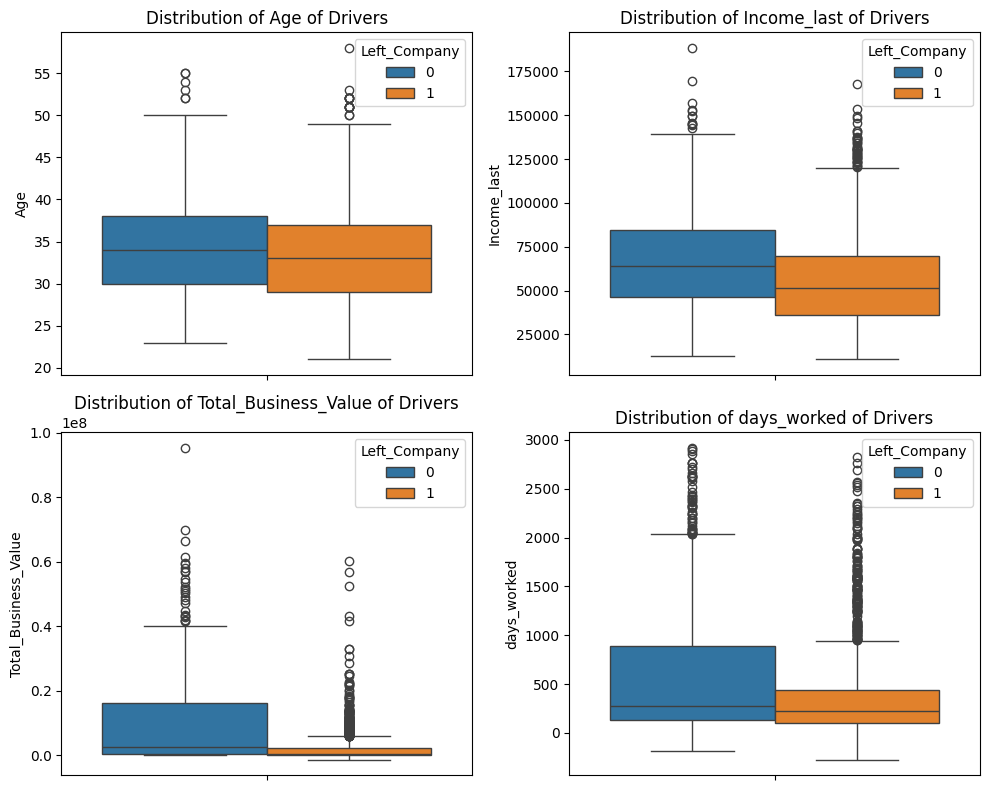

In [47]:
#Understanding Driver Churn: Visualizing impact of Age, Income, Total Business value, and Days worked
plt.figure(figsize=(10,8))
for i in range(1,5):
  plt.subplot(2,2,i)
  sns.boxplot(y=df_merged[num_cols[i-1]], hue=df_merged["Left_Company"])
  plt.title(f"Distribution of {num_cols[i-1]} of Drivers")
plt.tight_layout()
plt.show()

1. Age vs Churn:

No major difference in age distribution between those who left and those who stayed.
Median age for churned drivers is slightly lower, but overall, age doesn’t seem to be a strong factor in churn.

2. Income_last vs Churn:

Churned drivers have a lower median income compared to those who stayed.
The spread (IQR) of income for both groups is similar, but those who stayed tend to have slightly higher incomes overall.
This suggests that lower income might be a contributing factor to churn, but it’s not the sole reason.

3. Total Business Value vs Churn:

Strong difference: Drivers who stayed have significantly higher business value compared to churned drivers.
The churned drivers are concentrated at the lower end, while those who stayed have a much wider distribution with higher values.
This indicates that drivers bringing more business are more likely to stay, while lower-value drivers are more prone to churn.

4. Days Worked vs Churn:

Slight difference: The median days worked for churned drivers is lower than those who stayed.
However, the overall spread is similar, and there are churned drivers who worked a lot of days too.
This suggests that while fewer days worked might be a weak indicator of churn, it's not a very strong or decisive factor.

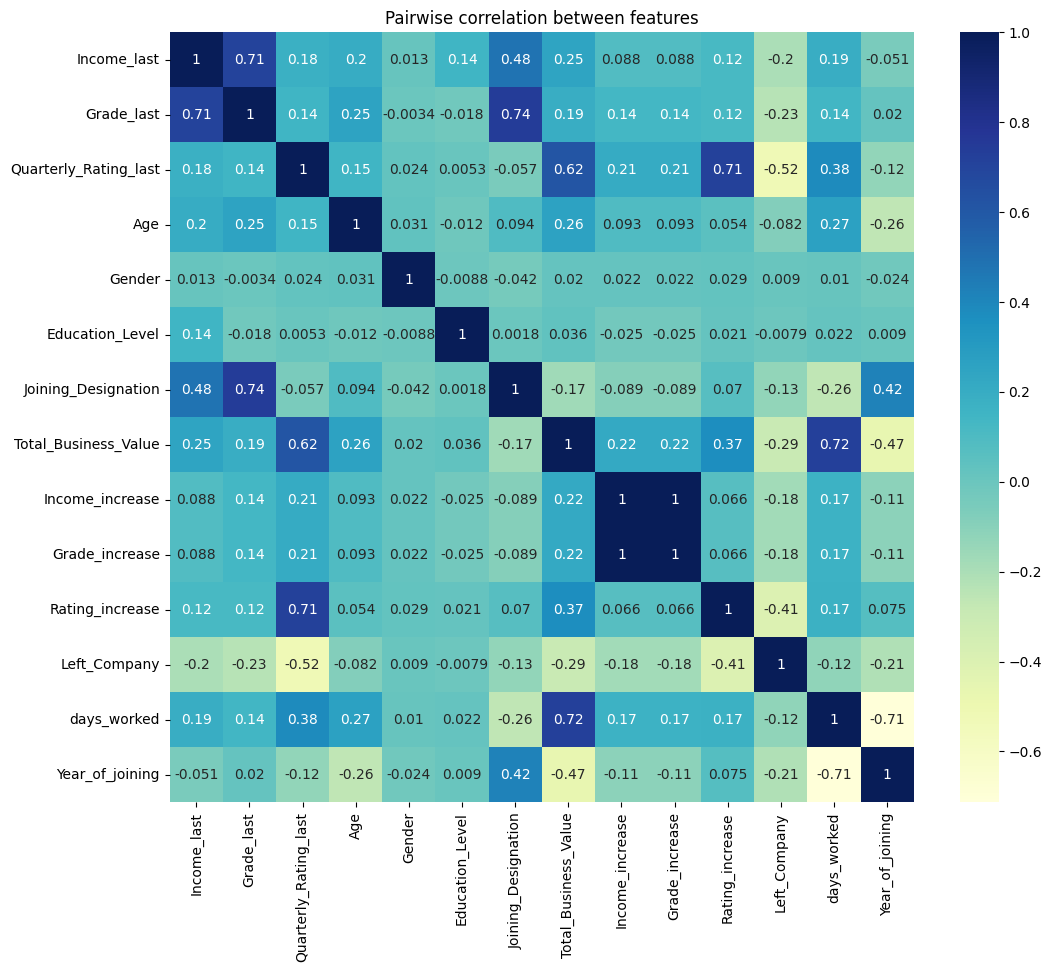

In [48]:
#Checking pairwise correlation between features
heatmap_df = df_merged.drop(columns=["Driver_ID","City"])
plt.figure(figsize=(12,10))
sns.heatmap(heatmap_df.corr(method="spearman"), cmap="YlGnBu", annot=True)
plt.title("Pairwise correlation between features")
plt.show()

1. The strongest correlation with Left_Company (churn) is Quarterly_Rating_last (-0.52), indicating that lower performance ratings are strongly linked to higher churn.

2. Total_Business_Value (-0.29) is also negatively correlated with churn, meaning drivers generating higher business value tend to stay longer.

3. Days_Worked (-0.12) has a weak negative correlation with churn, suggesting that drivers who work more days are slightly more likely to stay, but it is not a strong factor.

4. Income_last (-0.2) and Grade_last (-0.23) show that drivers with higher salaries and better grades tend to stay longer, though not as strongly as performance ratings.

5. Year_of_Joining (-0.21) suggests that more experienced drivers (who joined earlier) have lower churn rates, likely due to job stability.

6. Rating_increase (-0.18), Income_increase (-0.18), and Grade_increase (-0.18) show that drivers who received better ratings, salary hikes, or promotions were less likely to leave, likely due to job satisfaction.

7. Joining_Designation (-0.13) has a small negative correlation with churn, meaning drivers hired at better initial positions tend to stay longer.

8. Gender, Education_Level, and Age show very weak correlations (<0.1) with churn, indicating they are not major factors in driver attrition.

9. Quarterly_Rating_last (0.62) and Total_Business_Value (0.37) are positively correlated, meaning that better-performing drivers also generate more business, reinforcing the link between performance and retention.

10. Income_last and Grade_last (0.71) have a strong positive correlation, suggesting that higher grades are typically rewarded with higher salaries.

11. Income_increase and Grade_increase have a perfect correlation (1.0), meaning every increase in grade is accompanied by an increase in income, likely due to a structured compensation policy.

Key Takeaway

Quarterly performance ratings and total business value are the strongest indicators of churn. Drivers with lower ratings and less business value are at the highest risk of leaving.

In [49]:
#Dropping the highly correlated and other irrelevant features
df_merged.drop(columns=["Grade_increase","Driver_ID"], inplace=True)

## Handling Outliers

In [50]:
#Capping extreme values at 99th percentile to handle outliers
outlier_cols = ["Income_last","Total_Business_Value","days_worked"]
for col in outlier_cols:
  upper_bound = df_merged[col].quantile(0.99)
  df_merged[col] = np.where(df_merged[col]>upper_bound, upper_bound, df_merged[col])

In [51]:
df_merged[num_cols].describe()

,Age,Income_last,Total_Business_Value,days_worked
count,2381.000000,2381.000000,2.381000e+03,2381.000000
mean,33.804322,59212.118186,4.457122e+06,447.303150
std,5.909102,27996.036929,8.396607e+06,566.032374
min,21.000000,10747.000000,-1.385530e+06,-274.000000
25%,30.000000,39104.000000,0.000000e+00,105.000000
50%,33.000000,55315.000000,8.176800e+05,236.000000
75%,37.000000,75986.000000,4.173650e+06,505.000000
max,58.000000,137155.600000,4.313509e+07,2484.200000


# Data preparation for modeling

In [52]:
#One Hot Encoding for "City" feature
df_merged = pd.get_dummies(df_merged, columns=["City"], drop_first = True)

In [53]:
df_merged.shape

(2381, 41)

In [54]:
#Creating X and y
X = df_merged.drop(columns=["Left_Company"])
y = df_merged["Left_Company"]

In [55]:
#Creating train and test data in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest

## Default hyperparameters

In [57]:
#Random Forest with default hyperparameters
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled,y_train)
y_pred = rf.predict(X_test_scaled)

In [58]:
#Train score
train_rf = rf.score(X_train_scaled, y_train)
train_rf

1.0

In [59]:
#Test score
test_rf = rf.score(X_test_scaled, y_test)
test_rf

0.8475524475524475

Default Random Forest is clearly overfitting, as it achieves 100% accuracy on training data but drops to 84.75% on test data. This suggests the model is memorizing rather than generalizing well. Hyperparameter tuning (e.g., adjusting n_estimators, max_depth, min_samples_split, etc.) is needed to optimize performance and reduce overfitting.

Accuracy alone is not a reliable metric for imbalanced datasets like this one. Since the number of drivers who left far exceeds those who stayed, the model could be biased toward the majority class. To truly assess performance, we must analyze metrics like precision, recall, F1-score, and AUC-ROC.

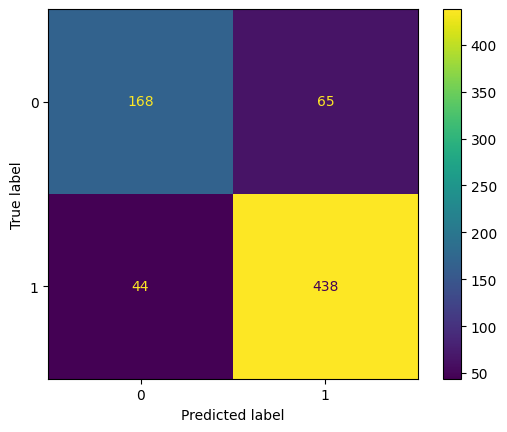

In [60]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
conf_matrix.plot()
plt.show()

Confusion Matrix Breakdown:

True Positives (TP): 438 (Correctly identified drivers who left)

True Negatives (TN): 168 (Correctly identified drivers who stayed)

False Positives (FP): 65 (Incorrectly predicted drivers who left but actually stayed)

False Negatives (FN): 44 (Incorrectly predicted drivers who stayed but actually left)

Since our primary focus is correctly identifying all drivers who left, false negatives (FN) are a concern because they represent drivers who actually left but were misclassified as staying. This means we need to focus on improving recall to minimize these false negatives.

In [61]:
#Defining a function to display feature importance
def feature_importance(X,model):
  weights = pd.DataFrame(list(zip(X.columns, model.feature_importances_)), columns=["Feature", "Weight"])
  weights["Magnitude"] = weights["Weight"].abs()
  weights = weights.sort_values(by="Magnitude", ascending=False)
  weights = weights.drop(columns=["Magnitude"])
  weights.set_index("Feature", inplace=True)
  return weights.head(10)

In [62]:
#Feature Importance
feature_importance(X,rf)

,Weight
Feature,
Total_Business_Value,0.152662
days_worked,0.140868
Year_of_joining,0.136821
Quarterly_Rating_last,0.119038
Income_last,0.087011
Rating_increase,0.070909
Age,0.065440
Grade_last,0.025016
Education_Level,0.023714


In [63]:
#Precision
from sklearn.metrics import precision_score
precision_rf = precision_score(y_test, y_pred)
precision_rf

0.8707753479125249

Precision tells us what proportion of positive identifications (predicted "driver left") were actually correct. In this case, about 87.08% of the drivers that the model predicted would leave actually did leave.

A high precision means the model is making fewer false positive errors (wrongly predicting a driver will leave when they actually stay). However, it does not account for false negatives, which is critical in our case.

In [64]:
#Recall
from sklearn.metrics import recall_score
recall_rf = recall_score(y_test, y_pred)
recall_rf

0.9087136929460581

Recall tells us what proportion of actual positives (actual "drivers who left") were correctly identified by the model. Here, the model correctly identified 90.87% of all drivers who actually left.

A high recall is crucial because it minimizes false negatives (drivers who left but were predicted to stay). Since our primary goal is to classify all drivers who left, recall is the more important metric in this scenario.

In [65]:
#F1-Score
from sklearn.metrics import f1_score
f1_rf = f1_score(y_test, y_pred)
f1_rf

0.8893401015228426

The model has an F1-score of 88.93%, indicating a good balance between precision and recall. This suggests strong overall performance in identifying drivers who left while minimizing misclassifications.

In [66]:
#Classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.72      0.76       233
           1       0.87      0.91      0.89       482

    accuracy                           0.85       715
   macro avg       0.83      0.81      0.82       715
weighted avg       0.85      0.85      0.85       715



The classification report confirms the model achieves 85% overall accuracy, with strong performance in identifying drivers who left (91% recall, 89% F1-score). However, it struggles with detecting drivers who stayed, capturing only 72% of them (recall) despite a decent precision (79%). This imbalance means the model is better at identifying those who leave but may misclassify some who stay. The difference between macro (82%) and weighted (85%) averages suggests a slight class imbalance, though not extreme.

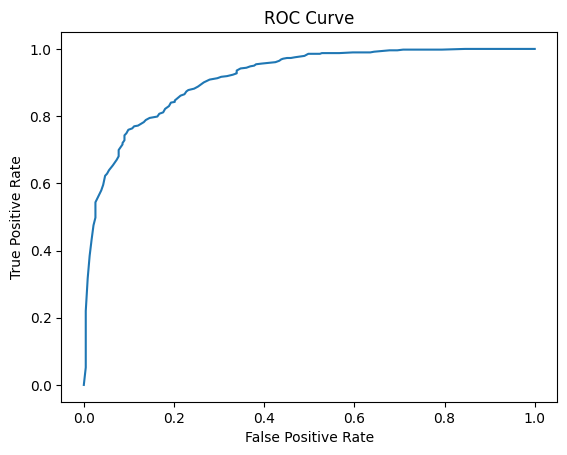

In [67]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [68]:
#ROC-AUC
roc_auc_rf = auc(fpr, tpr)
roc_auc_rf

np.float64(0.9137579470375581)

In [69]:
rf = pd.DataFrame({"Model": ["Random Forest"],
                   "Train_Acc":[train_rf],
                    "Test_Acc" :[test_rf],
                    "Precision": [precision_rf],
                    "Recall": [recall_rf],
                    "F1-Score": [f1_rf],
                    "AUC-ROC": [roc_auc_rf]})
rf = rf.round(3)
rf

,Model,Train_Acc,Test_Acc,Precision,Recall,F1-Score,AUC-ROC
0,Random Forest,1.0,0.848,0.871,0.909,0.889,0.914


## RF with Grid Search

Since the plain Random Forest model is overfitting, we will now use GridSearchCV to fine-tune hyperparameters and improve generalization. By testing different values for key parameters like n_estimators, max_depth min_samples_split, etc. we aim to reduce overfitting and find the best-performing model.

In [70]:
#Defining hyperparameter grid for Random Forest tuning
from sklearn.model_selection import GridSearchCV
params = {"n_estimators":[50,100,150],
          "max_depth": [5,10,20],
          "min_samples_split":[2,5],
          "min_samples_leaf":[1,2],
          "class_weight":[None, "balanced"],
          "random_state":[42]}

In [71]:
#Initializing GridSearchCV to optimize Random Forest
grid = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=params,
                    cv=3,
                    scoring="recall",
                    n_jobs=-1)

In [72]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [5, 10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150], 'random_state': [42]},
             scoring='recall')

In [73]:
#Best Random Forest model parameters
grid.best_params_

{'class_weight': None,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 42}

In [74]:
#Best Random Forest model
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

In [75]:
#Train accuracy
train_best_rf = best_rf.score(X_train_scaled, y_train)
train_best_rf

0.8427370948379351

In [76]:
#Test accuracy
test_best_rf = best_rf.score(X_test_scaled, y_test)
test_best_rf

0.8321678321678322

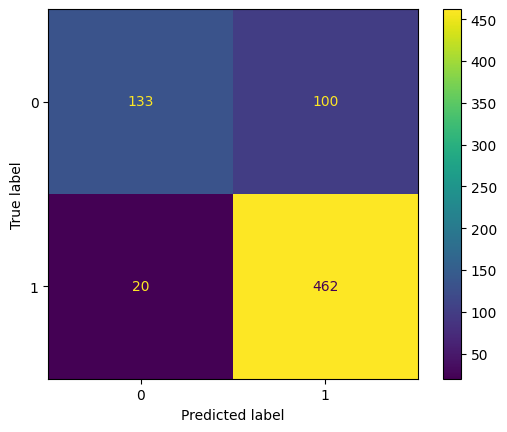

In [77]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
conf_matrix.plot()
plt.show()

In [78]:
#Feature Importance
feature_importance(X,best_rf)

,Weight
Feature,
Quarterly_Rating_last,0.240940
Total_Business_Value,0.177735
Year_of_joining,0.169918
Rating_increase,0.169343
days_worked,0.077923
Income_last,0.037252
Grade_last,0.032570
Joining_Designation,0.023851
Age,0.018037


In [79]:
#Precision
precision_best_rf = precision_score(y_test, y_pred)
precision_best_rf

0.8220640569395018

In [80]:
#Recall
recall_best_rf = recall_score(y_test, y_pred)
recall_best_rf

0.9585062240663901

In [81]:
#F1-Score
f1_best_rf = f1_score(y_test, y_pred)
f1_best_rf

0.8850574712643678

In [82]:
#Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.57      0.69       233
           1       0.82      0.96      0.89       482

    accuracy                           0.83       715
   macro avg       0.85      0.76      0.79       715
weighted avg       0.84      0.83      0.82       715



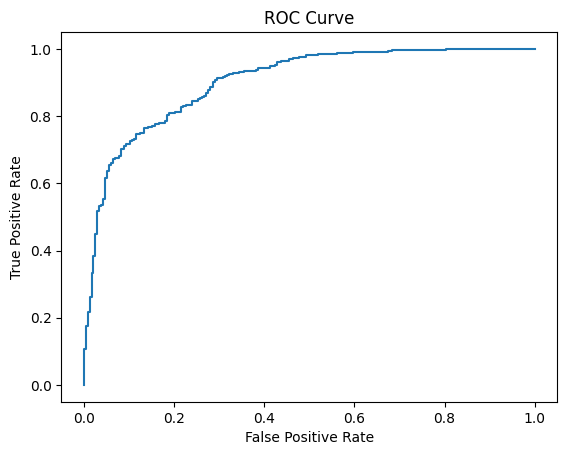

In [83]:
#ROC
y_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [84]:
#ROC-AUC
roc_auc_best_rf = auc(fpr, tpr)
roc_auc_best_rf

np.float64(0.9017238615924348)

In [85]:
rf_gs = pd.DataFrame({"Model": ["Random Forest (Grid Search)"],
                      "Train_Acc":[train_best_rf],
                      "Test_Acc" :[test_best_rf],
                      "Precision": [precision_best_rf],
                      "Recall": [recall_best_rf],
                      "F1-Score": [f1_best_rf],
                      "AUC-ROC": [roc_auc_best_rf]})
rf_gs = rf_gs.round(3)
comparison = pd.concat([rf, rf_gs], axis=0, ignore_index=True)
comparison

,Model,Train_Acc,Test_Acc,Precision,Recall,F1-Score,AUC-ROC
0,Random Forest,1.000,0.848,0.871,0.909,0.889,0.914
1,Random Forest (Grid Search),0.843,0.832,0.822,0.959,0.885,0.902


**RF vs. RF (Grid Search) – Key Takeaways**

Recall improved significantly (90.9% → 95.9%), making the model much better at identifying churned drivers.

Precision dropped slightly (87.1% → 82.2%), leading to more false positives (predicting churn when the driver actually stayed).

F1-score remained stable (88.9% → 88.5%), confirming a balanced trade-off between precision and recall.

Train accuracy reduced from 100% to 84.3%, meaning overfitting has decreased significantly.

Test accuracy remained nearly the same (84.8% → 83.2%), showing no major impact on overall correctness.

AUC-ROC decreased slightly (0.914 → 0.902), suggesting a small drop in the model’s ability to distinguish between churned and non-churned drivers.

Conclusion:

Grid Search successfully increased recall, making it a better model for identifying churned drivers, though at the cost of precision and AUC-ROC. Overfitting has reduced significantly, but further tuning may be needed to restore precision.

# Gradient Boosting

## Default hyperparameters

In [86]:
#Random Forest with default hyperparameters
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_scaled,y_train)
y_pred = gbc.predict(X_test_scaled)

In [87]:
#Train score
train_gbc = gbc.score(X_train_scaled, y_train)
train_gbc

0.9303721488595438

In [88]:
#Test score
test_gbc = gbc.score(X_test_scaled, y_test)
test_gbc

0.8503496503496504

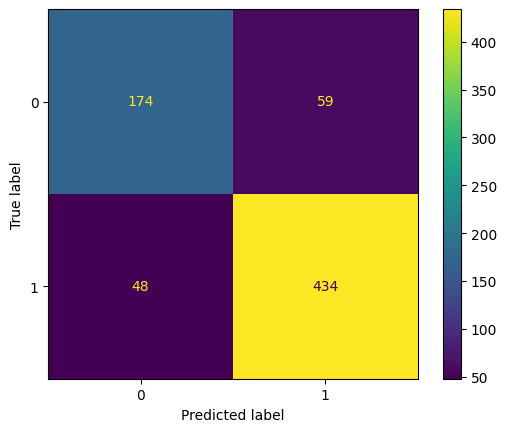

In [89]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
conf_matrix.plot()
plt.show()

In [90]:
#Feature Importance
feature_importance(X,gbc)

,Weight
Feature,
Quarterly_Rating_last,0.353742
Year_of_joining,0.313920
Total_Business_Value,0.132457
days_worked,0.130509
Income_last,0.019294
Age,0.010523
Gender,0.006202
City_C28,0.003969
Rating_increase,0.003708


In [91]:
#Precision
precision_gbc = precision_score(y_test, y_pred)
precision_gbc

0.8803245436105477

In [92]:
#Recall
recall_gbc = recall_score(y_test, y_pred)
recall_gbc

0.9004149377593361

In [93]:
#F1-Score
f1_gbc = f1_score(y_test, y_pred)
f1_gbc

0.8902564102564102

In [94]:
#Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       233
           1       0.88      0.90      0.89       482

    accuracy                           0.85       715
   macro avg       0.83      0.82      0.83       715
weighted avg       0.85      0.85      0.85       715



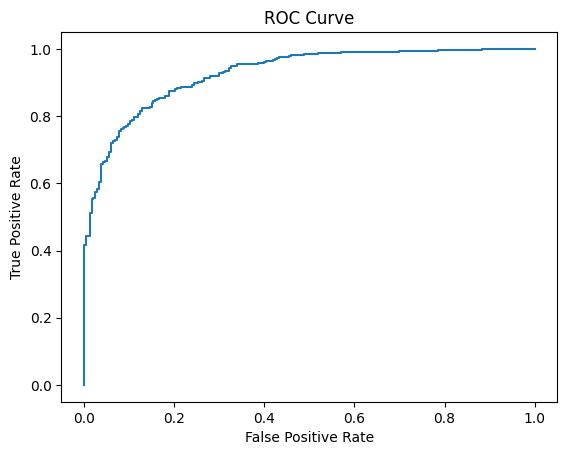

In [95]:
#ROC
y_pred_proba = gbc.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [96]:
#ROC-AUC
roc_auc_gbc = auc(fpr, tpr)
roc_auc_gbc

np.float64(0.9271632860221181)

In [97]:
gbdt = pd.DataFrame({"Model": ["Gradient Boosting"],
                      "Train_Acc" :[train_gbc],
                      "Test_Acc" :[test_gbc],
                      "Precision": [precision_gbc],
                      "Recall": [recall_gbc],
                      "F1-Score": [f1_gbc],
                      "AUC-ROC": [roc_auc_gbc]})
gbdt = gbdt.round(3)
comparison = pd.concat([comparison, gbdt], axis=0, ignore_index=True)
comparison

,Model,Train_Acc,Test_Acc,Precision,Recall,F1-Score,AUC-ROC
0,Random Forest,1.000,0.848,0.871,0.909,0.889,0.914
1,Random Forest (Grid Search),0.843,0.832,0.822,0.959,0.885,0.902
2,Gradient Boosting,0.930,0.850,0.880,0.900,0.890,0.927


## GBDT with Grid Search

In [98]:
#Defining hyperparameter grid for GBDT tuning
params = {"n_estimators":[50,100,150],
          "max_depth": [2,3,5],
          "min_samples_split":[2,5],
          "min_samples_leaf":[1,2],
          "learning_rate":[0.01, 0.1],
          "subsample": [0.8,1],
          "random_state":[42]}

In [99]:
#Initializing GridSearchCV to optimize Random Forest
grid = GridSearchCV(estimator=GradientBoostingClassifier(),
                    param_grid=params,
                    cv=3,
                    scoring="recall",
                    n_jobs=-1)

In [100]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [2, 3, 5],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150], 'random_state': [42],
                         'subsample': [0.8, 1]},
             scoring='recall')

In [101]:
#Best Random Forest model parameters
grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 42,
 'subsample': 0.8}

In [102]:
#Best GBDT model
best_gbdt = grid.best_estimator_
y_pred = best_gbdt.predict(X_test_scaled)

In [103]:
#Train accuracy
train_best_gbc = best_gbdt.score(X_train_scaled, y_train)
train_best_gbc

0.7605042016806722

In [104]:
#Test accuracy
test_best_gbc =best_gbdt.score(X_test_scaled, y_test)
test_best_gbc

0.7706293706293706

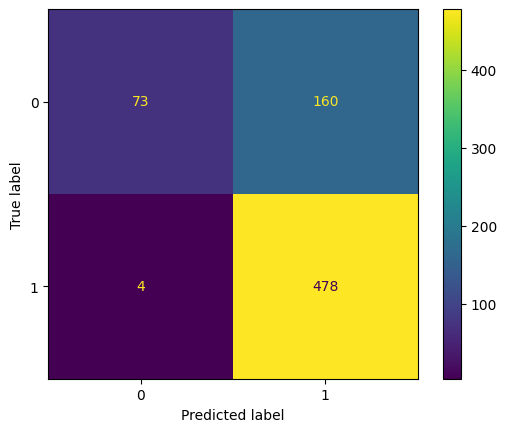

In [105]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
conf_matrix.plot()
plt.show()

In [106]:
#Feature Importance
feature_importance(X,best_gbdt)

,Weight
Feature,
Quarterly_Rating_last,0.591570
Year_of_joining,0.338502
Total_Business_Value,0.069500
Age,0.000428
Income_last,0.000000
Gender,0.000000
Education_Level,0.000000
Grade_last,0.000000
Joining_Designation,0.000000


In [107]:
#Precision
precision_best_gbc = precision_score(y_test, y_pred)
precision_best_gbc

0.7492163009404389

In [108]:
#Recall
recall_best_gbc = recall_score(y_test, y_pred)
recall_best_gbc

0.991701244813278

In [109]:
#F1-Score
f1_best_gbc = f1_score(y_test, y_pred)
f1_best_gbc

0.8535714285714285

In [110]:
#Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.31      0.47       233
           1       0.75      0.99      0.85       482

    accuracy                           0.77       715
   macro avg       0.85      0.65      0.66       715
weighted avg       0.81      0.77      0.73       715



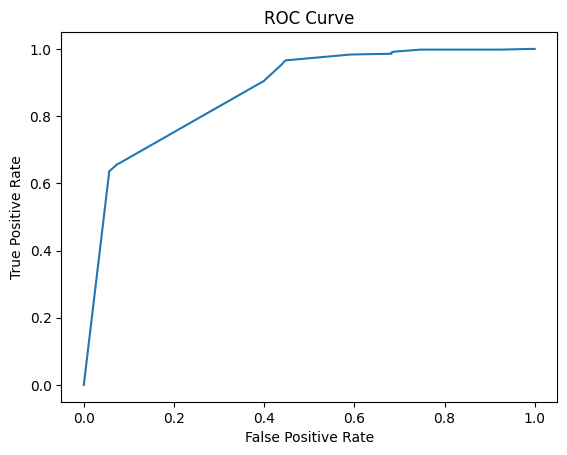

In [111]:
#ROC
y_pred_proba = best_gbdt.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [112]:
#ROC-AUC
roc_auc_best_gbc = auc(fpr, tpr)
roc_auc_best_gbc

np.float64(0.8748508539169768)

In [113]:
gbdt_grid = pd.DataFrame({"Model": ["Gradient Boosting (Grid Search)"],
                          "Train_Acc" :[train_best_gbc],
                           "Test_Acc" :[test_best_gbc],
                           "Precision": [precision_best_gbc],
                           "Recall": [recall_best_gbc],
                           "F1-Score": [f1_best_gbc],
                           "AUC-ROC": [roc_auc_best_gbc]})
gbdt_grid = gbdt_grid.round(3)
comparison = pd.concat([comparison, gbdt_grid], axis=0, ignore_index=True)
comparison

,Model,Train_Acc,Test_Acc,Precision,Recall,F1-Score,AUC-ROC
0,Random Forest,1.000,0.848,0.871,0.909,0.889,0.914
1,Random Forest (Grid Search),0.843,0.832,0.822,0.959,0.885,0.902
2,Gradient Boosting,0.930,0.850,0.880,0.900,0.890,0.927
3,Gradient Boosting (Grid Search),0.761,0.771,0.749,0.992,0.854,0.875


**Model Comparison – Key Takeaways**

-Gradient Boosting (Grid Search) achieved the highest recall (99.2%), making it the best model for correctly identifying drivers who left. However, this came at the cost of precision (74.9%) and accuracy (77.1%), meaning more false positives (drivers incorrectly predicted as leaving).

-Random Forest (Grid Search) also prioritized recall (95.9%), but had better precision (82.2%) and overall accuracy (83.2%) compared to GBDT Grid Search. It strikes a better balance between recall and false positives.

-Plain Gradient Boosting (without tuning) is the most well-rounded model, achieving the highest AUC-ROC (0.927), along with strong recall (90.0%) and precision (88.0%). This model is less aggressive in predicting churn, making fewer false positive errors.

-Both Grid Search models sacrificed accuracy for recall, which is expected since the hyperparameter tuning was recall-focused. Random Forest dropped from 84.8% to 83.2%, while Gradient Boosting dropped significantly from 85.0% to 77.1%.

-False Negatives (missed churned drivers) are lowest in GBDT Grid Search, making it the best model for catching at-risk drivers. However, it over-predicts churn, meaning some staying drivers will be incorrectly flagged.

-Plain Random Forest had the highest accuracy (84.8%), but its recall (90.9%) is lower than the Grid Search models. This means it misses more churned drivers compared to recall-optimized models.

-AUC-ROC is highest for Plain Gradient Boosting (0.927), meaning it ranks churn vs. non-churn drivers best in terms of probability. However, this doesn't mean it has the highest recall.

**Final Recommendation**

If the goal is minimizing false negatives (churned drivers misclassified as staying), GBDT Grid Search (99.2% recall) is the best choice.

If the goal is a balance between recall and fewer false positives, Random Forest (Grid Search) (95.9% recall, 82.2% precision) is the best trade-off.

If business costs of false positives are high, Plain Gradient Boosting (AUC-ROC 0.927, Precision 88%) is a safer choice.

# SMOTE

In [184]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [185]:
from collections import Counter
# Check the new class distribution
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution before SMOTE: Counter({1: 1134, 0: 532})
Class distribution after SMOTE: Counter({0: 1134, 1: 1134})


In [186]:
#Defining hyperparameter grid for Random Forest tuning
from sklearn.model_selection import GridSearchCV
params = {"n_estimators":[50,100],
          "max_depth": [5,10],
          "min_samples_split":[2,5],
          "min_samples_leaf":[1,2],
          "random_state":[42]}

In [187]:
#Initializing GridSearchCV to optimize Random Forest
grid = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=params,
                    cv=3,
                    scoring="recall",
                    n_jobs=-1)

In [188]:
grid.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [50, 100],
                         'random_state': [42]},
             scoring='recall')

In [189]:
#Best Random Forest model parameters
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50,
 'random_state': 42}

In [190]:
#Best Random Forest model
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

In [191]:
#Train accuracy
train_best_rf = best_rf.score(X_train_smote, y_train_smote)
train_best_rf

0.9435626102292769

In [192]:
#Test accuracy
test_best_rf = best_rf.score(X_test_scaled, y_test)
test_best_rf

0.8265734265734266

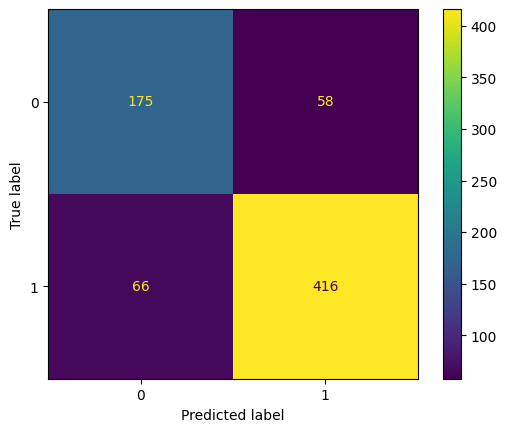

In [193]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
conf_matrix.plot()
plt.show()

In [194]:
#Feature Importance
feature_importance(X,best_rf)

,Weight
Feature,
Year_of_joining,0.201498
Quarterly_Rating_last,0.191120
Total_Business_Value,0.123010
days_worked,0.102301
Rating_increase,0.097906
Grade_last,0.051938
Joining_Designation,0.043734
Income_last,0.042124
Gender,0.029041


In [195]:
#Precision
precision_best_rf = precision_score(y_test, y_pred)
precision_best_rf

0.8776371308016878

In [196]:
#Recall
recall_best_rf = recall_score(y_test, y_pred)
recall_best_rf

0.8630705394190872

In [197]:
#F1-Score
f1_best_rf = f1_score(y_test, y_pred)
f1_best_rf

0.8702928870292888

Applying SMOTE did not improve results as expected. While recall remained strong (87.7%), precision dropped (86.3%), and overall test accuracy fell to 82.6%, making it worse than even the plain Random Forest model. Overfitting was reduced (train accuracy = 94.3%), but the trade-off in performance wasn’t worth it. SMOTE-generated synthetic samples likely introduced noise, leading to poorer generalization on real test data. Given these results, SMOTE is not a viable strategy for this dataset, and it's best to proceed without it.

# Business Insights and Recommendations

**Key Predictor Variables & Their Significance**

1. Quarterly Rating & Business Value: Direct Impact on Churn

Drivers with consistently low quarterly ratings have a much higher churn rate.

High-performing drivers (higher ratings & business value) tend to stay longer.
Among churned drivers, many had ratings of 1, whereas long-tenured drivers had ratings of 2 or higher.

This confirms that driver performance is a strong retention factor.

2. Income & Grade Increase: Strongest Retention Factors

Drivers who received an income increase have much lower churn.

Among churned drivers, a significant portion had stagnant salaries.

Similarly, grade improvement is strongly correlated with lower attrition.
This highlights that salary stagnation and lack of promotion drive drivers away.

3. Job Tenure & Experience: Early-Stage Churn is Highest

Churn is significantly higher in the first 1-2 years of joining.

Drivers who have been with Ola for 3+ years are far more stable.

This indicates that retaining new drivers in the initial phase is crucial.

4. City-Specific Churn Trends: Some Locations Face Higher Attrition

Certain cities have a much higher churn rate despite large driver bases.

Some locations have significantly better driver retention.

This suggests that operational issues or external market factors are affecting retention in specific regions.

5. Entry-Level Designations Face Higher Attrition

Drivers who started at Designation 1 or 2 have the highest churn.

Higher-level drivers have significantly better retention.

This shows that career growth opportunities play a key role in long-term retention.


**Business Strategy Enhancements Based on Model Insights**

1. Performance-Based Retention Program

Incentivize high quarterly ratings with direct rewards.
Offer targeted performance bonuses for drivers with consistently strong ratings.

2. Structured Salary & Promotion Growth Plans

Set up salary hikes linked to tenure and performance.
Provide clear promotion paths for drivers at risk of stagnation.

3. Targeted Retention for New Drivers

Since early-stage churn is the highest, focus on strong onboarding.
Introduce retention bonuses for drivers who complete the first 1-2 years.

4. Location-Specific Retention Adjustments

Identify high-churn cities and investigate operational inefficiencies.
Offer location-based incentives to improve retention in high-risk areas.

5. Career Growth & Upskilling Initiatives

Train and upskill lower-designation drivers to encourage long-term commitment.
Provide better financial planning assistance to drivers to improve their earnings stability.
